# Unit 5 - Financial Planning


In [21]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import requests as request
import json
import matplotlib.pyplot as mplot
from MCForecastTools import MCSimulation
import pytz

%matplotlib inline

In [22]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [23]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [24]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]


In [25]:
# Compute current value of my crpto
btc_value = btc * btc_price
eth_value = eth * eth_price
crypto_total = btc_value + eth_value

# Print current crypto wallet balance

print(f"The current value of your {btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth} ETH is ${eth_value:0.2f}")
print(f"The total value of your crypto portfolio is ${crypto_total:0.2f}")

The current value of your 1.2 BTC is $52407.43
The current value of your 5.3 ETH is $16429.85
The total value of your crypto portfolio is $68837.28


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [26]:
# Current amount of shares
spy = 50
agg = 200

In [27]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api_key") 
alpaca_secret_key = os.getenv("alpaca_secret_key")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version = "v2")

In [28]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-20", tz="America/Chicago").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
stocks_close = alpaca.get_barset(ticker, timeframe, start = today, end= today).df


# Preview DataFrame
stocks_close

AGG                                    SPY  \
                             open   high     low   close   volume   open   
time                                                                       
2021-05-20 00:00:00-04:00  114.08  114.3  114.08  114.29  5646506  411.8   

                                                              
                              high     low   close    volume  
time                                                          
2021-05-20 00:00:00-04:00  416.625  411.67  415.24  69408898

In [29]:
# Pick AGG and SPY close prices
agg_close = stocks_close.iloc[0,3]
spy_close = stocks_close.iloc[0,8]
                  
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $114.29
Current SPY closing price: $415.24


In [30]:
# Compute the current value of shares
spy_value = (spy) * (spy_close)
agg_value = (agg) * (agg_close)
stocks_total = (spy_value) + (agg_value)

# Print current value of share
print(f"The current value of your {spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {agg} AGG shares is ${agg_value:0.2f}")
print(f"The current value of your stock portfolio is ${stocks_total:0.2f}")

The current value of your 50 SPY shares is $20762.00
The current value of your 200 AGG shares is $22858.00
The current value of your stock portfolio is $43620.00


### Savings Health Analysis

In [31]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = [{'Savings': crypto_total}, {'Savings': stocks_total}]
savings_df = pd.DataFrame(savings_data, index = ['Crypto', 'Stocks'])
total_savings = crypto_total + stocks_total
# Display savings DataFrame
savings_df

,Savings
Crypto,68837.280081
Stocks,43620.000000


['You have a total of $112457.28 in your savings',
 '61% of your savings is held in the crypto-currencies BTC and ETH',
 '39% of your savings is held in stocks SPY and AGG']

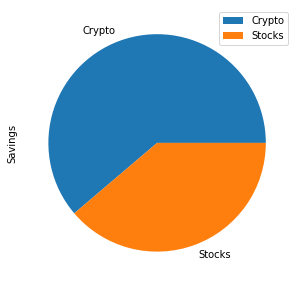

In [32]:
# Plot savings pie chart
savings_df.plot.pie(y="Savings", figsize=(5, 5))
pie = (f'You have a total of ${total_savings:0.2f} in your savings')
crypto_percent = (f'{((crypto_total / total_savings) * 100):0.0f}% of your savings is held in the crypto-currencies BTC and ETH')
stock_percent = (f'{((stocks_total / total_savings) * 100):0.0f}% of your savings is held in stocks SPY and AGG')
savings_app = [pie, crypto_percent, stock_percent]
savings_app

In [33]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_total + stocks_total

# Validate saving health
if total_savings >= emergency_fund:
    savings_app_response = ('Congratulations! You have saved more than 3 months income for an emergency fund!')
else:
    savings_app_response = (f'You should increase your savings for an emergency fund. You currently need ${emergency_fund - total_savings} more to save 3 months income for an emergency fund')
print(savings_app_response)



Congratulations! You have saved more than 3 months income for an emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [34]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-20', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2021-05-20', tz='America/Chicago').isoformat()
thirty_year_end_date = pd.Timestamp('2021-05-20', tz='America/Chicago').isoformat

In [36]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = '1D'
historical_stock_data = alpaca.get_barset(ticker, timeframe, start = start_date, end = end_date, limit = 1000).df

# Display sample data
historical_stock_data

AGG                                            \
                              open      high       low     close      volume   
time                                                                           
2017-05-31 00:00:00-04:00  109.640  109.8100  109.6400  109.7500   2011554.0   
2017-06-01 00:00:00-04:00  109.360  109.5000  109.3409  109.4700   2241270.0   
2017-06-02 00:00:00-04:00  109.740  109.8900  109.7047  109.8400   1322101.0   
2017-06-05 00:00:00-04:00  109.660  109.7400  109.6000  109.6600   2074161.0   
2017-06-06 00:00:00-04:00  109.870  109.9500  109.8100  109.8700   1434088.0   
2017-06-07 00:00:00-04:00  109.810  109.8700  109.7000  109.7300   1570692.0   
2017-06-08 00:00:00-04:00  109.700  109.7000  109.5101  109.6500   1243191.0   
2017-06-09 00:00:00-04:00  109.510  109.6300  109.4600  109.5600   1356020.0   
2017-06-12 00:00:00-04:00  109.510  109.6958  109.4700  109.5550   1184601.0   
2017-06-13 00:00:00-04:00  109.430  109.6000  109.4300  109.5800   1324388.0   
2017-06-14 00:00:00-04:00  110.000  110.1800  109.8500  109.9500   2304819.0   
2017-06-15 00:00:00-04:00  109.900  109.9000  109.7800  109.8700   1938779.0   
2017-06-16 00:00:00-04:00  109.860  109.9700  109.8500  109.9450   1709677.0   
2017-06-19 00:00:00-04:00  109.870  109.9000  109.7400  109.7900   1375531.0   
2017-06-20 00:00:00-04:00  109.850  110.0300  109.8000  109.9750   2010628.0   
2017-06-21 00:00:00-04:00  109.880  110.0400  109.8800  109.9800   1085301.0   
2017-06-22 00:00:00-04:00  110.060  110.0947  109.9500  110.0500   1295361.0   
2017-06-23 00:00:00-04:00  110.010  110.1085  109.9800  110.0700   1101304.0   
2017-06-26 00:00:00-04:00  110.190  110.2400  110.1300  110.1600   1364100.0   
2017-06-27 00:00:00-04:00  109.930  109.9800  109.7901  109.8300   2883305.0   
2017-06-28 00:00:00-04:00  109.850  109.8800  109.6800  109.8500  12016805.0   
2017-06-29 00:00:00-04:00  109.530  109.6800  109.4650  109.6400   2457876.0   
2017-06-30 00:00:00-04:00  109.620  109.6273  109.4600  109.4900   2201175.0   
2017-07-03 00:00:00-04:00  109.300  109.3000  109.0100  109.0800   1681516.0   
2017-07-05 00:00:00-04:00  109.080  109.1800  109.0000  109.1500   2694196.0   
2017-07-06 00:00:00-04:00  108.950  109.0000  108.8200  108.9500   2057393.0   
2017-07-07 00:00:00-04:00  108.890  108.9500  108.8300  108.8700   2536724.0   
2017-07-10 00:00:00-04:00  108.970  109.0200  108.8900  108.9600   1940466.0   
2017-07-11 00:00:00-04:00  108.970  109.1000  108.9300  109.0550   1613602.0   
2017-07-12 00:00:00-04:00  109.380  109.4300  109.2600  109.3800   1787218.0   
...                            ...       ...       ...       ...         ...   
2021-04-09 00:00:00-04:00  114.110  114.3300  114.0350  114.1800   5293317.0   
2021-04-12 00:00:00-04:00  114.172  114.1720  114.0000  114.1500   3486052.0   
2021-04-13 00:00:00-04:00  114.120  114.4600  114.1100  114.4600   3882646.0   
2021-04-14 00:00:00-04:00  114.410  114.4400  114.2800  114.3800   3519353.0   
2021-04-15 00:00:00-04:00  113.780  114.9800  113.7800  114.8100   5455777.0   
2021-04-16 00:00:00-04:00  114.560  114.6650  114.5000  114.5400   3488514.0   
2021-04-19 00:00:00-04:00  114.000  114.5000  114.0000  114.4400   4820664.0   
2021-04-20 00:00:00-04:00  114.420  114.6700  114.3900  114.6200   3674209.0   
2021-04-21 00:00:00-04:00  114.600  114.7400  114.5300  114.7400   5250384.0   
2021-04-22 00:00:00-04:00  114.740  114.8000  114.5900  114.7700   3518947.0   
2021-04-23 00:00:00-04:00  114.810  115.0860  114.6415  114.7500   3506457.0   
2021-04-26 00:00:00-04:00  114.740  114.8015  114.6500  114.6500   2867784.0   
2021-04-27 00:00:00-04:00  115.130  115.1300  114.3700  114.3700   3421667.0   
2021-04-28 00:00:00-04:00  114.450  114.4685  114.2000  114.4400   6185936.0   
2021-04-29 00:00:00-04:00  114.140  114.3700  114.0900  114.3700   5796983.0   
2021-04-30 00:00:00-04:00  114.410  114.5150  114.3300  114.5000   5160765.0   
2021-05-03 00:00:00-04:00  114.

In [37]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_yr_sim = MCSimulation(historical_stock_data, [.4, .6], 500, 252 * 30)


In [38]:
# Printing the simulation input data
historical_stock_data

AGG                                            \
                              open      high       low     close      volume   
time                                                                           
2017-05-31 00:00:00-04:00  109.640  109.8100  109.6400  109.7500   2011554.0   
2017-06-01 00:00:00-04:00  109.360  109.5000  109.3409  109.4700   2241270.0   
2017-06-02 00:00:00-04:00  109.740  109.8900  109.7047  109.8400   1322101.0   
2017-06-05 00:00:00-04:00  109.660  109.7400  109.6000  109.6600   2074161.0   
2017-06-06 00:00:00-04:00  109.870  109.9500  109.8100  109.8700   1434088.0   
2017-06-07 00:00:00-04:00  109.810  109.8700  109.7000  109.7300   1570692.0   
2017-06-08 00:00:00-04:00  109.700  109.7000  109.5101  109.6500   1243191.0   
2017-06-09 00:00:00-04:00  109.510  109.6300  109.4600  109.5600   1356020.0   
2017-06-12 00:00:00-04:00  109.510  109.6958  109.4700  109.5550   1184601.0   
2017-06-13 00:00:00-04:00  109.430  109.6000  109.4300  109.5800   1324388.0   
2017-06-14 00:00:00-04:00  110.000  110.1800  109.8500  109.9500   2304819.0   
2017-06-15 00:00:00-04:00  109.900  109.9000  109.7800  109.8700   1938779.0   
2017-06-16 00:00:00-04:00  109.860  109.9700  109.8500  109.9450   1709677.0   
2017-06-19 00:00:00-04:00  109.870  109.9000  109.7400  109.7900   1375531.0   
2017-06-20 00:00:00-04:00  109.850  110.0300  109.8000  109.9750   2010628.0   
2017-06-21 00:00:00-04:00  109.880  110.0400  109.8800  109.9800   1085301.0   
2017-06-22 00:00:00-04:00  110.060  110.0947  109.9500  110.0500   1295361.0   
2017-06-23 00:00:00-04:00  110.010  110.1085  109.9800  110.0700   1101304.0   
2017-06-26 00:00:00-04:00  110.190  110.2400  110.1300  110.1600   1364100.0   
2017-06-27 00:00:00-04:00  109.930  109.9800  109.7901  109.8300   2883305.0   
2017-06-28 00:00:00-04:00  109.850  109.8800  109.6800  109.8500  12016805.0   
2017-06-29 00:00:00-04:00  109.530  109.6800  109.4650  109.6400   2457876.0   
2017-06-30 00:00:00-04:00  109.620  109.6273  109.4600  109.4900   2201175.0   
2017-07-03 00:00:00-04:00  109.300  109.3000  109.0100  109.0800   1681516.0   
2017-07-05 00:00:00-04:00  109.080  109.1800  109.0000  109.1500   2694196.0   
2017-07-06 00:00:00-04:00  108.950  109.0000  108.8200  108.9500   2057393.0   
2017-07-07 00:00:00-04:00  108.890  108.9500  108.8300  108.8700   2536724.0   
2017-07-10 00:00:00-04:00  108.970  109.0200  108.8900  108.9600   1940466.0   
2017-07-11 00:00:00-04:00  108.970  109.1000  108.9300  109.0550   1613602.0   
2017-07-12 00:00:00-04:00  109.380  109.4300  109.2600  109.3800   1787218.0   
...                            ...       ...       ...       ...         ...   
2021-04-09 00:00:00-04:00  114.110  114.3300  114.0350  114.1800   5293317.0   
2021-04-12 00:00:00-04:00  114.172  114.1720  114.0000  114.1500   3486052.0   
2021-04-13 00:00:00-04:00  114.120  114.4600  114.1100  114.4600   3882646.0   
2021-04-14 00:00:00-04:00  114.410  114.4400  114.2800  114.3800   3519353.0   
2021-04-15 00:00:00-04:00  113.780  114.9800  113.7800  114.8100   5455777.0   
2021-04-16 00:00:00-04:00  114.560  114.6650  114.5000  114.5400   3488514.0   
2021-04-19 00:00:00-04:00  114.000  114.5000  114.0000  114.4400   4820664.0   
2021-04-20 00:00:00-04:00  114.420  114.6700  114.3900  114.6200   3674209.0   
2021-04-21 00:00:00-04:00  114.600  114.7400  114.5300  114.7400   5250384.0   
2021-04-22 00:00:00-04:00  114.740  114.8000  114.5900  114.7700   3518947.0   
2021-04-23 00:00:00-04:00  114.810  115.0860  114.6415  114.7500   3506457.0   
2021-04-26 00:00:00-04:00  114.740  114.8015  114.6500  114.6500   2867784.0   
2021-04-27 00:00:00-04:00  115.130  115.1300  114.3700  114.3700   3421667.0   
2021-04-28 00:00:00-04:00  114.450  114.4685  114.2000  114.4400   6185936.0   
2021-04-29 00:00:00-04:00  114.140  114.3700  114.0900  114.3700   5796983.0   
2021-04-30 00:00:00-04:00  114.410  114.5150  114.3300  114.5000   5160765.0   
2021-05-03 00:00:00-04:00  114.

In [39]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_yr_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004596,1.006238,1.014891,1.008069,0.995885,0.999318,1.009635,1.000601,1.002595,1.003797,...,1.003581,0.993852,0.983253,1.005059,0.999692,1.006980,0.995821,1.004672,0.994520,0.997429
2,1.014320,0.996266,1.014014,1.018259,0.990449,0.995428,1.010962,1.004833,1.004469,0.998211,...,1.003899,1.002501,0.980599,1.000692,1.012780,0.998403,0.996485,0.990282,0.994659,1.008576
3,1.010172,0.982337,1.026984,1.010319,0.998922,0.989633,1.021170,1.000043,1.017530,0.991436,...,1.000711,0.999527,0.982075,0.999381,1.018310,0.996750,0.993312,0.993041,1.000919,0.998298
4,0.982652,0.968601,1.018355,1.005669,0.998736,0.976507,1.012715,1.006493,1.014691,0.999667,...,1.009263,1.000180,0.985971,1.004864,1.026223,1.002681,0.994950,0.988932,0.998230,0.991331
5,0.995801,0.968693,1.013153,1.027352,0.995982,0.975420,1.023399,1.002326,1.002551,1.005940,...,1.007372,0.996349,0.985712,1.000074,1.034127,1.004449,0.980814,0.994102,0.987570,0.969819
6,1.000408,0.979568,1.004190,1.033627,0.995905,0.960938,1.037285,1.008030,0.991981,0.994145,...,1.002391,0.989167,0.992604,0.998129,1.037678,1.017775,0.980589,0.986743,0.991919,0.965810
7,1.000463,0.980493,1.004856,1.032447,0.994421,0.960342,1.032311,1.006145,0.991969,0.984913,...,1.003765,0.989909,0.992450,0.998300,1.050430,1.023056,0.984028,0.998629,0.987545,0.973131
8,1.013803,0.975888,0.991563,1.042706,1.000609,0.956989,1.049223,1.010259,0.984756,0.992429,...,0.994991,0.982631,0.990399,1.002803,1.040914,1.018569,0.975557,0.991920,0.987898,0.978296
9,1.017927,0.985623,0.991931,1.048011,0.987765,0.965534,1.047393,1.011605,0.978622,0.986892,...,1.002622,0.985218,1.002159,1.003940,1.037977,1.017042,0.981947,0.995332,0.985742,0.974219


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

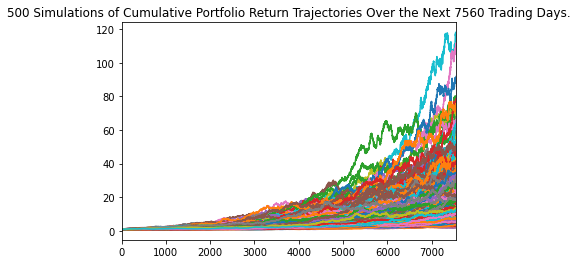

In [40]:
# Plot simulation outcomes
thirty_yr_sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

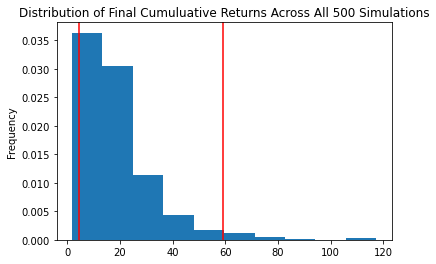

In [41]:
# Plot probability distribution and confidence intervals
thirty_yr_sim.plot_distribution()

### Retirement Analysis

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_yr_summary = thirty_yr_sim.summarize_cumulative_return()

# Print summary statistics
print(thirty_yr_summary)

count           500.000000
mean             19.266254
std              14.754185
min               1.732149
25%               9.699562
50%              15.423310
75%              23.737526
max             117.277246
95% CI Lower      4.313714
95% CI Upper     59.248531
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [43]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = thirty_yr_summary.loc['95% CI Lower'] * initial_investment
ci_upper = thirty_yr_summary.loc['95% CI Upper'] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $86274.2704112038 and $1184970.6155860105
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86274.2704112038 and $1184970.6155860105


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [44]:
# Set initial investment
increased_investment = initial_investment * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
inc_ci_lower = thirty_yr_summary.loc['95% CI Lower'] * increased_investment
inc_ci_upper = thirty_yr_summary.loc['95% CI Upper'] * increased_investment

# Print results
print(f"There is a 95% chance that an investment of ${increased_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${inc_ci_lower} and ${inc_ci_upper}")

There is a 95% chance that an investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $129411.40561680571 and $1777455.9233790159
